In [1]:
from hstar import process
from hstar import trilinear
from hzz import angles
from hzz import zcandidate

import numpy as np
import vector
import matplotlib.pyplot as plt

2024-11-01 12:54:17.514244: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
sample = process.Sample(weight='wt', 
    amplitude = process.Basis.SBI, components = {
    process.Basis.SBI: 'msq_sbi_sm',
    process.Basis.SIG: 'msq_sig_sm',
    process.Basis.BKG: 'msq_bkg_sm',
    process.Basis.INT: 'msq_int_sm'
  })

#sample.open(csv = [
#  '../ggZZ4e_all.csv',
#  '../ggZZ4m_all.csv',
#  '../ggZZ2e2m_all.csv'
#  ], xs=[1.4783394, 0.47412769, 0.47412769], lumi=3000., k=1.83, nrows=1000000
#)
sample.open(csv = '../ggZZ2e2m_all.csv', xs = 0.47412769, lumi=3000, k=1.83)

0          1.321122e-08
1          1.385171e-08
2          7.684210e-09
3          1.018895e-10
4          8.891041e-09
               ...     
2606826    1.628886e-09
2606827    8.882103e-10
2606828    6.835974e-11
2606829    8.139814e-09
2606830    9.310137e-11
Name: msq_sbi_sm, Length: 2606831, dtype: float64
0          2.382824e-10
1          1.464287e-10
2          6.720742e-11
3          2.016814e-12
4          1.242182e-10
               ...     
2606826    3.378906e-11
2606827    1.427201e-11
2606828    1.441803e-11
2606829    9.192225e-11
2606830    2.871757e-12
Name: msq_sig_sm, Length: 2606831, dtype: float64
0          1.385642e-08
1          1.429341e-08
2          7.944555e-09
3          1.039572e-10
4          9.308557e-09
               ...     
2606826    1.684909e-09
2606827    9.063882e-10
2606828    6.761026e-11
2606829    8.459965e-09
2606830    1.025652e-10
Name: msq_bkg_sm, Length: 2606831, dtype: float64
0         -8.834835e-10
1         -5.881285e-10
2         

In [3]:
zmasses = zcandidate.ZmassPairChooser(sample)
leptons = zmasses.find_Z()

kinematics, legal_inds = angles.calculate(leptons[:,0], leptons[:,1], leptons[:,2], leptons[:,3])

kinematics = kinematics[legal_inds]
zmasses.df = zmasses.df.take(legal_inds)
zmasses.sample.events = zmasses.df

leptons = leptons[legal_inds]

c6_mod = trilinear.Modifier(c6_values = [-5,-1,0,1,5], c6_amplitudes = ['msq_sbi_c6_6', 'msq_sbi_c6_10', 'msq_sbi_c6_11', 'msq_sbi_c6_12', 'msq_sbi_c6_16'])
c6_weights = c6_mod.modify(sample=zmasses.sample, c6=[-20,-10,10,20,30])

/home/max/Uni/WS24/BachelorArbeit/higgs-offshell-interpretation/hzz/angles.py:57: RuntimeWarning: invalid value encountered in divide
  phi = z1.dot(n12.cross(n34))/np.abs(z1.dot(n12.cross(n34)))*np.arccos(-n12.dot(n34))
/home/max/Uni/WS24/BachelorArbeit/higgs-offshell-interpretation/hzz/angles.py:57: RuntimeWarning: invalid value encountered in arccos
  phi = z1.dot(n12.cross(n34))/np.abs(z1.dot(n12.cross(n34)))*np.arccos(-n12.dot(n34))


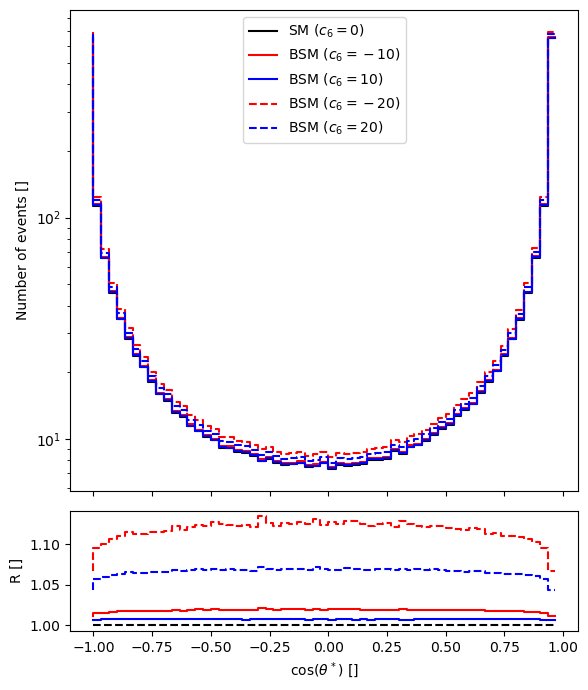

In [4]:
cth_str = kinematics[:,0]

hist, bins = np.histogram(cth_str, bins=60, range=(-1,1), weights=sample.events['wt'])
hist1, bins1 = np.histogram(cth_str, bins=60, range=(-1,1), weights=c6_weights.T[1])
hist2, bins2 = np.histogram(cth_str, bins=60, range=(-1,1), weights=c6_weights.T[2])
hist3, bins3 = np.histogram(cth_str, bins=60, range=(-1,1), weights=c6_weights.T[0])
hist4, bins4 = np.histogram(cth_str, bins=60, range=(-1,1), weights=c6_weights.T[3])

fig, (ax1, ax2) = plt.subplots(2,1, gridspec_kw={'height_ratios': [4, 1]}, figsize=(6,7))

ax1.set_xticklabels([])

ax1.step(bins[:-1], hist, color='k', label=u'SM ($c_6=0$)')
ax1.step(bins[:-1], hist1, color='r', label=u'BSM ($c_6=-10$)')
ax1.step(bins[:-1], hist2, color='b', label=u'BSM ($c_6=10$)')

ax1.step(bins[:-1], hist3, color='r', linestyle='--', label=u'BSM ($c_6=-20$)')
ax1.step(bins[:-1], hist4, color='b', linestyle='--', label=u'BSM ($c_6=20$)')

ax1.set_ylabel('Number of events []')
ax1.set_yscale('log')

ax1.legend()

ax2.step(bins[:-1], hist/hist, color='k', linestyle='--', label=u'SM ($c_6=0$)')
ax2.step(bins[:-1], hist1/hist, color='r', label=u'BSM ($c_6=-10$)')
ax2.step(bins[:-1], hist2/hist, color='b', label=u'BSM ($c_6=10$)')

ax2.step(bins[:-1], hist3/hist, color='r', linestyle='--', label=u'BSM ($c_6=-20$)')
ax2.step(bins[:-1], hist4/hist, color='b', linestyle='--', label=u'BSM ($c_6=20$)')

ax2.set_xlabel(u'$\mathrm{cos}(\\theta^*)$ []')
ax2.set_ylabel('R []')
#ax2.set_ybound(0.99,1.02)

fig.tight_layout()

plt.show()

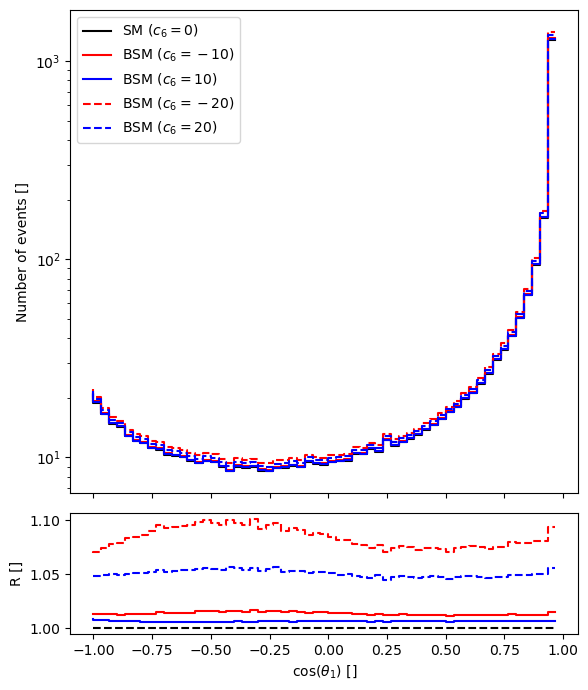

In [5]:
cth1 = kinematics[:,1]

hist, bins = np.histogram(cth1, bins=60, range=(-1,1), weights=sample.events['wt'])
hist1, bins1 = np.histogram(cth1, bins=60, range=(-1,1), weights=c6_weights.T[1])
hist2, bins2 = np.histogram(cth1, bins=60, range=(-1,1), weights=c6_weights.T[2])
hist3, bins3 = np.histogram(cth1, bins=60, range=(-1,1), weights=c6_weights.T[0])
hist4, bins4 = np.histogram(cth1, bins=60, range=(-1,1), weights=c6_weights.T[3])

fig, (ax1, ax2) = plt.subplots(2,1, gridspec_kw={'height_ratios': [4, 1]}, figsize=(6,7))

ax1.set_xticklabels([])

ax1.step(bins[:-1], hist, color='k', label=u'SM ($c_6=0$)')
ax1.step(bins[:-1], hist1, color='r', label=u'BSM ($c_6=-10$)')
ax1.step(bins[:-1], hist2, color='b', label=u'BSM ($c_6=10$)')

ax1.step(bins[:-1], hist3, color='r', linestyle='--', label=u'BSM ($c_6=-20$)')
ax1.step(bins[:-1], hist4, color='b', linestyle='--', label=u'BSM ($c_6=20$)')

ax1.set_ylabel('Number of events []')
ax1.set_yscale('log')

ax1.legend()

ax2.step(bins[:-1], hist/hist, color='k', linestyle='--', label=u'SM ($c_6=0$)')
ax2.step(bins[:-1], hist1/hist, color='r', label=u'BSM ($c_6=-10$)')
ax2.step(bins[:-1], hist2/hist, color='b', label=u'BSM ($c_6=10$)')

ax2.step(bins[:-1], hist3/hist, color='r', linestyle='--', label=u'BSM ($c_6=-20$)')
ax2.step(bins[:-1], hist4/hist, color='b', linestyle='--', label=u'BSM ($c_6=20$)')

ax2.set_xlabel(u'$\mathrm{cos}(\\theta_1)$ []')
ax2.set_ylabel('R []')
#ax2.set_ybound(0.99,1.02)

fig.tight_layout()

plt.show()

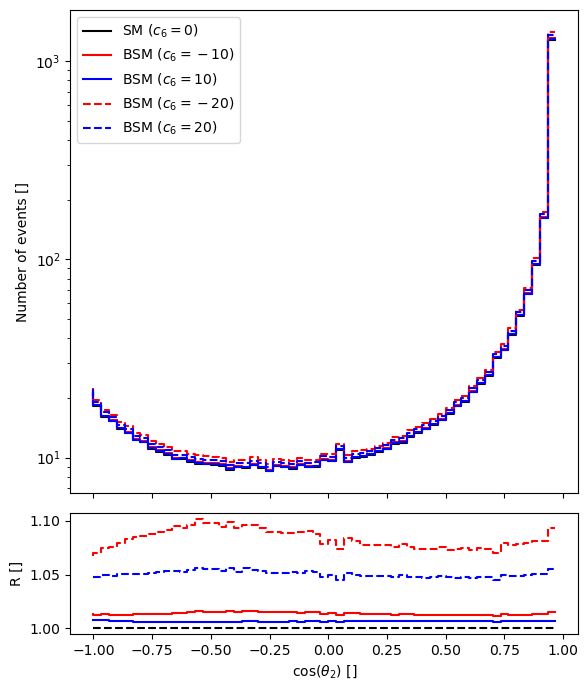

In [6]:
cth2 = kinematics[:,2]

hist, bins = np.histogram(cth2, bins=60, range=(-1,1), weights=sample.events['wt'])
hist1, bins1 = np.histogram(cth2, bins=60, range=(-1,1), weights=c6_weights.T[1])
hist2, bins2 = np.histogram(cth2, bins=60, range=(-1,1), weights=c6_weights.T[2])
hist3, bins3 = np.histogram(cth2, bins=60, range=(-1,1), weights=c6_weights.T[0])
hist4, bins4 = np.histogram(cth2, bins=60, range=(-1,1), weights=c6_weights.T[3])

fig, (ax1, ax2) = plt.subplots(2,1, gridspec_kw={'height_ratios': [4, 1]}, figsize=(6,7))

ax1.set_xticklabels([])

ax1.step(bins[:-1], hist, color='k', label=u'SM ($c_6=0$)')
ax1.step(bins[:-1], hist1, color='r', label=u'BSM ($c_6=-10$)')
ax1.step(bins[:-1], hist2, color='b', label=u'BSM ($c_6=10$)')

ax1.step(bins[:-1], hist3, color='r', linestyle='--', label=u'BSM ($c_6=-20$)')
ax1.step(bins[:-1], hist4, color='b', linestyle='--', label=u'BSM ($c_6=20$)')

ax1.set_ylabel('Number of events []')
ax1.set_yscale('log')

ax1.legend()

ax2.step(bins[:-1], hist/hist, color='k', linestyle='--', label=u'SM ($c_6=0$)')
ax2.step(bins[:-1], hist1/hist, color='r', label=u'BSM ($c_6=-10$)')
ax2.step(bins[:-1], hist2/hist, color='b', label=u'BSM ($c_6=10$)')

ax2.step(bins[:-1], hist3/hist, color='r', linestyle='--', label=u'BSM ($c_6=-20$)')
ax2.step(bins[:-1], hist4/hist, color='b', linestyle='--', label=u'BSM ($c_6=20$)')

ax2.set_xlabel(u'$\mathrm{cos}(\\theta_2)$ []')
ax2.set_ylabel('R []')
#ax2.set_ybound(0.99,1.02)

fig.tight_layout()

plt.show()

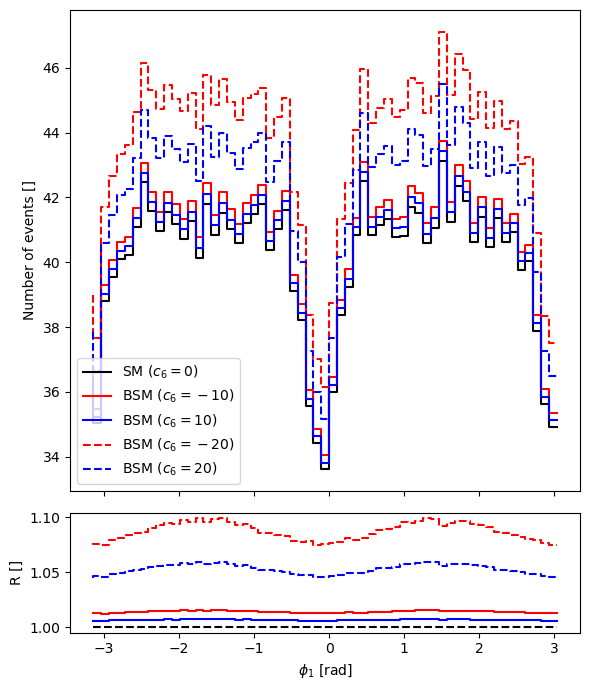

In [7]:
phi1 = kinematics[:,3]

hist, bins = np.histogram(phi1, bins=60, range=(-np.pi,np.pi), weights=sample.events['wt'])
hist1, bins1 = np.histogram(phi1, bins=60, range=(-np.pi,np.pi), weights=c6_weights.T[1])
hist2, bins2 = np.histogram(phi1, bins=60, range=(-np.pi,np.pi), weights=c6_weights.T[2])
hist3, bins3 = np.histogram(phi1, bins=60, range=(-np.pi,np.pi), weights=c6_weights.T[0])
hist4, bins4 = np.histogram(phi1, bins=60, range=(-np.pi,np.pi), weights=c6_weights.T[3])

fig, (ax1, ax2) = plt.subplots(2,1, gridspec_kw={'height_ratios': [4, 1]}, figsize=(6,7))

ax1.set_xticklabels([])

ax1.step(bins[:-1], hist, color='k', label=u'SM ($c_6=0$)')
ax1.step(bins[:-1], hist1, color='r', label=u'BSM ($c_6=-10$)')
ax1.step(bins[:-1], hist2, color='b', label=u'BSM ($c_6=10$)')

ax1.step(bins[:-1], hist3, color='r', linestyle='--', label=u'BSM ($c_6=-20$)')
ax1.step(bins[:-1], hist4, color='b', linestyle='--', label=u'BSM ($c_6=20$)')

ax1.set_ylabel('Number of events []')
#ax1.set_yscale('log')

ax1.legend()

ax2.step(bins[:-1], hist/hist, color='k', linestyle='--', label=u'SM ($c_6=0$)')
ax2.step(bins[:-1], hist1/hist, color='r', label=u'BSM ($c_6=-10$)')
ax2.step(bins[:-1], hist2/hist, color='b', label=u'BSM ($c_6=10$)')

ax2.step(bins[:-1], hist3/hist, color='r', linestyle='--', label=u'BSM ($c_6=-20$)')
ax2.step(bins[:-1], hist4/hist, color='b', linestyle='--', label=u'BSM ($c_6=20$)')

ax2.set_xlabel(u'$\phi_1$ [rad]')
ax2.set_ylabel('R []')
#ax2.set_ybound(0.99,1.02)

fig.tight_layout()

plt.show()

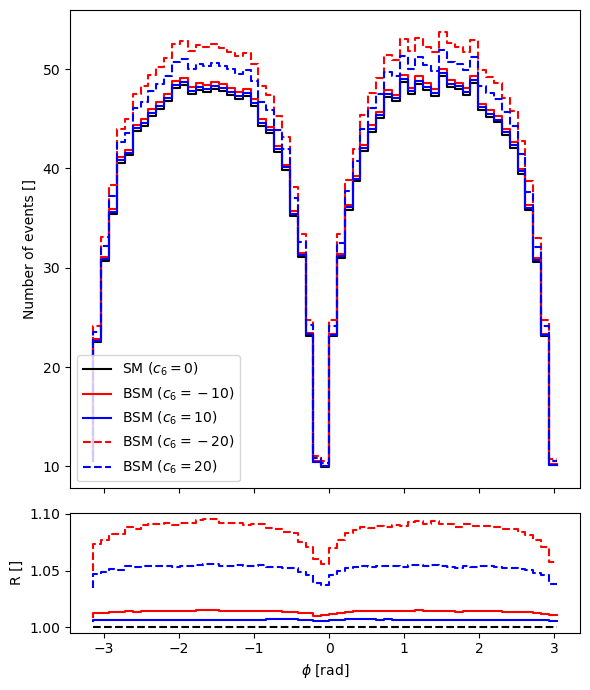

In [8]:
phi = kinematics[:,4]

hist, bins = np.histogram(phi, bins=60, range=(-np.pi,np.pi), weights=sample.events['wt'])
hist1, bins1 = np.histogram(phi, bins=60, range=(-np.pi,np.pi), weights=c6_weights.T[1])
hist2, bins2 = np.histogram(phi, bins=60, range=(-np.pi,np.pi), weights=c6_weights.T[2])
hist3, bins3 = np.histogram(phi, bins=60, range=(-np.pi,np.pi), weights=c6_weights.T[0])
hist4, bins4 = np.histogram(phi, bins=60, range=(-np.pi,np.pi), weights=c6_weights.T[3])

fig, (ax1, ax2) = plt.subplots(2,1, gridspec_kw={'height_ratios': [4, 1]}, figsize=(6,7))

ax1.set_xticklabels([])

ax1.step(bins[:-1], hist, color='k', label=u'SM ($c_6=0$)')
ax1.step(bins[:-1], hist1, color='r', label=u'BSM ($c_6=-10$)')
ax1.step(bins[:-1], hist2, color='b', label=u'BSM ($c_6=10$)')

ax1.step(bins[:-1], hist3, color='r', linestyle='--', label=u'BSM ($c_6=-20$)')
ax1.step(bins[:-1], hist4, color='b', linestyle='--', label=u'BSM ($c_6=20$)')

ax1.set_ylabel('Number of events []')
#ax1.set_yscale('log')

ax1.legend()

ax2.step(bins[:-1], hist/hist, color='k', linestyle='--', label=u'SM ($c_6=0$)')
ax2.step(bins[:-1], hist1/hist, color='r', label=u'BSM ($c_6=-10$)')
ax2.step(bins[:-1], hist2/hist, color='b', label=u'BSM ($c_6=10$)')

ax2.step(bins[:-1], hist3/hist, color='r', linestyle='--', label=u'BSM ($c_6=-20$)')
ax2.step(bins[:-1], hist4/hist, color='b', linestyle='--', label=u'BSM ($c_6=20$)')

ax2.set_xlabel(u'$\phi$ [rad]')
ax2.set_ylabel('R []')
#ax2.set_ybound(0.99,1.02)

fig.tight_layout()

plt.show()

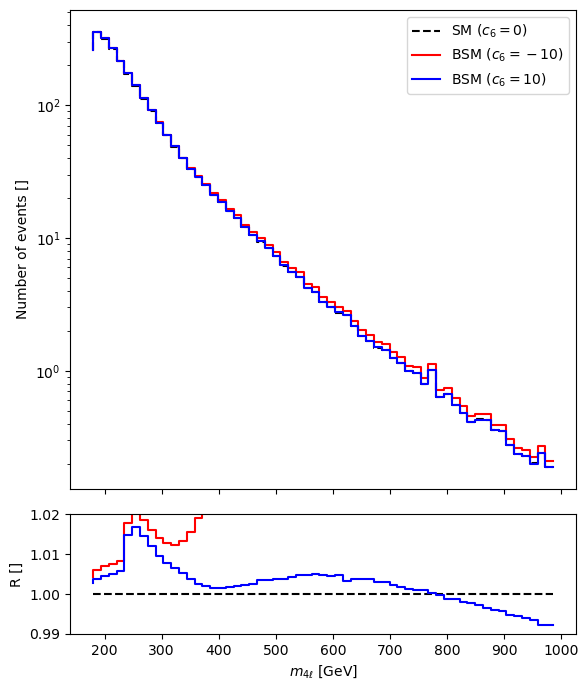

In [9]:
m4l = (leptons[:,0] + leptons[:,1] + leptons[:,2] + leptons[:,3]).mass
m4l = zmasses.m4l[legal_inds]

hist, bins = np.histogram(m4l, bins=60, range=(180,1000), weights=zmasses.sample.events['wt'])
hist1, bins = np.histogram(m4l, bins=60, range=(180,1000), weights=c6_weights.T[1]) # -10
hist2, bins = np.histogram(m4l, bins=60, range=(180,1000), weights=c6_weights.T[2]) # 10
hist3, bins = np.histogram(m4l, bins=60, range=(180,1000), weights=c6_weights.T[0]) # -20
hist4, bins = np.histogram(m4l, bins=60, range=(180,1000), weights=c6_weights.T[3]) # 20
hist5, bins = np.histogram(m4l, bins=60, range=(180,1000), weights=c6_weights.T[4]) # 30

fig, (ax1, ax2) = plt.subplots(2,1, gridspec_kw={'height_ratios': [4, 1]}, figsize=(6,7))

ax1.set_xticklabels([])

ax1.step(bins[:-1], hist, color='k', label=u'SM ($c_6=0$)', linestyle='--')
ax1.step(bins[:-1], hist1, color='r', label=u'BSM ($c_6=-10$)')
ax1.step(bins[:-1], hist2, color='b', label=u'BSM ($c_6=10$)')
#ax1.step(bins[:-1], hist5, color='b', label=u'BSM ($c_6=30$)')

ax1.set_ylabel('Number of events []')
ax1.set_yscale('log')

ax1.legend()


ax2.step(bins[:-1], hist/hist, color='k', linestyle='--', label=u'SM ($c_6=0$)')
ax2.step(bins[:-1], hist1/hist, color='r', label=u'BSM ($c_6=-10$)')
ax2.step(bins[:-1], hist2/hist, color='b', label=u'BSM ($c_6=10$)')
#ax2.step(bins[:-1], hist5/hist, color='b', label=u'BSM ($c_6=30$)')

ax2.set_xlabel(u'$m_{4\ell}$ [GeV]')
ax2.set_ylabel('R []')
ax2.set_ybound(0.99,1.02)

fig.tight_layout()

plt.show()